In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
columns_name=['user_id','item_id','rating','timestamp']

In [4]:
user_data = pd.read_csv(r"C:\Users\91709\Desktop\u.data",sep="\t",names=columns_name)

In [5]:
user_data.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [6]:
movie_titles = pd.read_csv(r"C:\Users\91709\Desktop\Movie_Id_Titles")
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [7]:
user_data = pd.merge(user_data,movie_titles,on="item_id")
user_data.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [ ]:
user_data.drop('title_y',axis=1,inplace=True)
user_data.rename(columns={"title_x":"title"},inplace=True)
user_data.head()

In [9]:
ratings = pd.DataFrame(user_data.groupby('title')['rating'].mean())
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [10]:
ratings['n_reviews'] = pd.DataFrame(user_data.groupby('title')['rating'].count())
ratings.head()

,rating,n_reviews
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


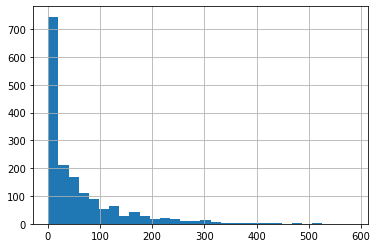

In [11]:
ratings['n_reviews'].hist(bins=30)

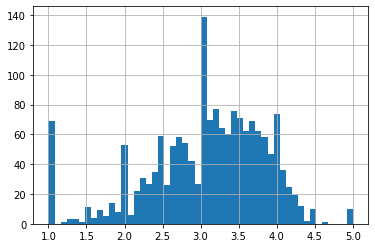

In [12]:
ratings['rating'].hist(bins=50)

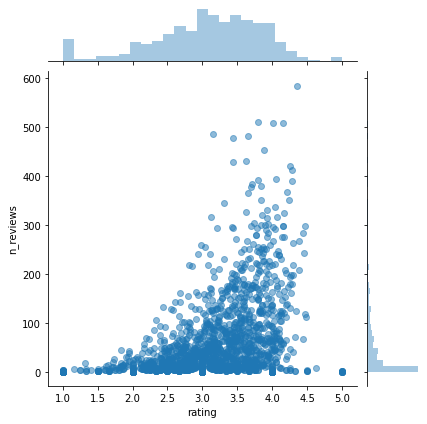

In [13]:
sns.jointplot(x='rating',y='n_reviews',data=ratings,alpha=0.5)

In [15]:
moviemat = user_data.pivot_table(index="user_id",columns='title',values='rating')
moviemat.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
ratings.sort_values('n_reviews',ascending=False).head(10)

,rating,n_reviews
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


In [18]:
star_war_movie_ratings = moviemat['Star Wars (1977)']
fargo_movie_ratings = moviemat['Fargo (1996)']

In [19]:
star_war_movie_ratings.head()

user_id
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
Name: Star Wars (1977), dtype: float64

In [26]:
similar_to_star_wars= moviemat.corrwith(star_war_movie_ratings)

In [27]:
similar_to_fargo = moviemat.corrwith(fargo_movie_ratings)

In [28]:
corr_starwars = pd.DataFrame(similar_to_star_wars,columns=["Correlation"])
corr_fargo = pd.DataFrame(similar_to_fargo,columns=["Correlation"])

In [33]:
corr_starwars.dropna(inplace=True)
corr_starwars.sort_values(by="Correlation",ascending=False).head(10)

,Correlation
title,
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
Man of the Year (1995),1.0
Hollow Reed (1996),1.0
"Beans of Egypt, Maine, The (1994)",1.0
"Good Man in Africa, A (1994)",1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0


In [36]:
corr_starwars = corr_starwars.join(ratings['n_reviews'])
corr_starwars.head()

,Correlation,n_reviews
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


In [37]:
corr_starwars[corr_starwars['n_reviews']>100].sort_values("Correlation",ascending=False).head()

,Correlation,n_reviews
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130


In [38]:
corr_fargo.dropna(inplace=True)
corr_fargo = corr_fargo.join(ratings['n_reviews'])
corr_fargo.head()

,Correlation,n_reviews
title,,
'Til There Was You (1997),0.100000,9
1-900 (1994),0.866025,5
101 Dalmatians (1996),-0.245368,109
12 Angry Men (1957),0.098676,125
187 (1997),0.142509,41


In [39]:
corr_fargo[corr_fargo['n_reviews']>100].sort_values("Correlation",ascending=False).head()

,Correlation,n_reviews
title,,
Fargo (1996),1.000000,508
Sling Blade (1996),0.381159,136
Lone Star (1996),0.370915,187
Quiz Show (1994),0.355031,175
Lawrence of Arabia (1962),0.353408,173
